In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

# Understanding the Brain Tumor MRI Dataset

This code processes a dataset of MRI scans stored in `/kaggle/input/brain-tumor-mri-dataset`. The dataset is organized into two main folders: **Training** and **Testing**. Each folder contains subfolders named after tumor types, such as **glioma**, **meningioma**, **pituitary**, or **notumor**. These subfolders hold image files (e.g., `.jpg` or `.png`) of MRI scans.

The goal is to load these images into a table (called a **DataFrame**) and gather basic information about the dataset, such as the number of images, the distribution of tumor types, and whether any data is missing. This is the first step in understanding the dataset before building a machine learning model to classify brain tumors.

## What Each Part of the Code Does

- **Setting the Path**:
  - The code defines the dataset location using a variable `USER_PATH`.
  - This path points to the dataset folder on **Kaggle**, a platform for data science projects.

- **Loading the Dataset**:
  - A function called `load_dataset` is created to find and organize images. It:
    - Examines the **Training** and **Testing** folders.
    - Checks each tumor type subfolder (e.g., **glioma**) within them.
    - Identifies image files (only those ending in `.jpg`, `.png`, or `.jpeg`).
    - Creates a list where each entry includes:
      - The image’s file path (e.g., `Training/glioma/image1.jpg`).
      - The tumor type (e.g., **glioma**).
      - The split (**Training** or **Testing**).
    - Converts this list into a **DataFrame**, a spreadsheet-like table with columns: `image_path`, `label` (tumor type), and `split` (Training or Testing).

- **Displaying the Data**:
  - After loading, the code prints a confirmation message: "Dataset loaded successfully!"
  - It shows the first five rows of the **DataFrame** to preview the data, including file paths and labels.

- **Calculating Statistics**:
  - The code provides key information about the dataset:
    - **Total Images**: Counts the total number of images.
    - **Class Distribution**: Shows how many images belong to each tumor type (e.g., 1000 **glioma**, 800 **meningioma**). This checks if the dataset is balanced (no tumor type dominates).
    - **Split Distribution**: Counts images in **Training** vs. **Testing**. Training images teach the model, while Testing images evaluate its performance.
    - **Missing Values**: Verifies if any data (e.g., image paths or labels) is missing in the **DataFrame**. Missing data can cause issues, so this ensures the dataset is complete.

In [22]:
# Define dataset path
USER_PATH = r"/kaggle/input/brain-tumor-mri-dataset"

# 1. Load Dataset
def load_dataset(path):
    """Load MRI dataset from Training and Testing folders, extracting image paths and tumor type labels.
    
    Args:
        path (str): Root directory of the dataset.
    
    Returns:
        pd.DataFrame: DataFrame with columns 'image_path', 'label', and 'split'.
    """
    data = []
    # Iterate through Training and Testing folders
    for split in ['Training', 'Testing']:
        split_path = os.path.join(path, split)
        # Iterate through tumor type subfolders (e.g., glioma, meningioma)
        for tumor_type in os.listdir(split_path):
            tumor_path = os.path.join(split_path, tumor_type)
            # Check if the path is a directory
            if os.path.isdir(tumor_path):
                # Iterate through image files in the tumor type folder
                for img_name in os.listdir(tumor_path):
                    # Filter for valid image file extensions
                    if img_name.endswith(('.jpg', '.png', '.jpeg')):
                        data.append({
                            'image_path': os.path.join(tumor_path, img_name),
                            'label': tumor_type,
                            'split': split
                        })
    return pd.DataFrame(data)

# Load dataset and display first few rows
data = load_dataset(USER_PATH)
print("Dataset loaded successfully!")
print(data.head())

# 2. Dataset Statistics
# Display total number of images
print(f"\nTotal images: {len(data)}")

# Display distribution of tumor types
print("\nClass distribution:")
print(data['label'].value_counts())

# Display distribution of Training vs. Testing splits
print("\nSplit distribution:")
print(data['split'].value_counts())

# Check for missing values in the dataset
print("\nMissing values:")
print(data.isnull().sum())

Dataset loaded successfully!
                                          image_path      label     split
0  /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary  Training
1  /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary  Training
2  /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary  Training
3  /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary  Training
4  /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary  Training

Total images: 7023

Class distribution:
label
notumor       2000
pituitary     1757
meningioma    1645
glioma        1621
Name: count, dtype: int64

Split distribution:
split
Training    5712
Testing     1311
Name: count, dtype: int64

Missing values:
image_path    0
label         0
split         0
dtype: int64


## 2. Image Dimensions Analysis

### Purpose
This section analyzes the dimensions (width and height in pixels) of the MRI images in the dataset. Understanding image dimensions is important to ensure consistency, as machine learning models like ResNet typically require images to have the same size.

### Code Explanation
We extract the dimensions of up to 100 images (or fewer if the dataset is smaller) to check their sizes. This helps identify if all images have the same dimensions or if resizing is needed.

```python
# 3. Image Dimensions (sample up to 100 images or available images)
# Extract dimensions of images for analysis
dimensions = [Image.open(img_path).size for img_path in data['image_path'][:min(100, len(data))]]
print("\nUnique image dimensions:", set(dimensions))

In [24]:
# 3. Image Dimensions (sample up to 100 images or available images)
# Extract dimensions of images for analysis
dimensions = [Image.open(img_path).size for img_path in data['image_path'][:min(100, len(data))]]
print("\nUnique image dimensions:", set(dimensions))


Unique image dimensions: {(1365, 1365), (512, 512), (256, 256)}


## 3. Visualizations

### Chart 1: Class Distribution (Bar Plot)

#### Purpose
This visualization shows the number of MRI images for each tumor type (e.g., glioma, meningioma, pituitary, notumor) in the dataset. It helps identify if the dataset is balanced, meaning each tumor type has a similar number of images, which is important for training a fair machine learning model.

#### Code Explanation
The code creates a bar plot to display the count of images per tumor type using the `seaborn` library, which makes attractive and informative statistical graphics.

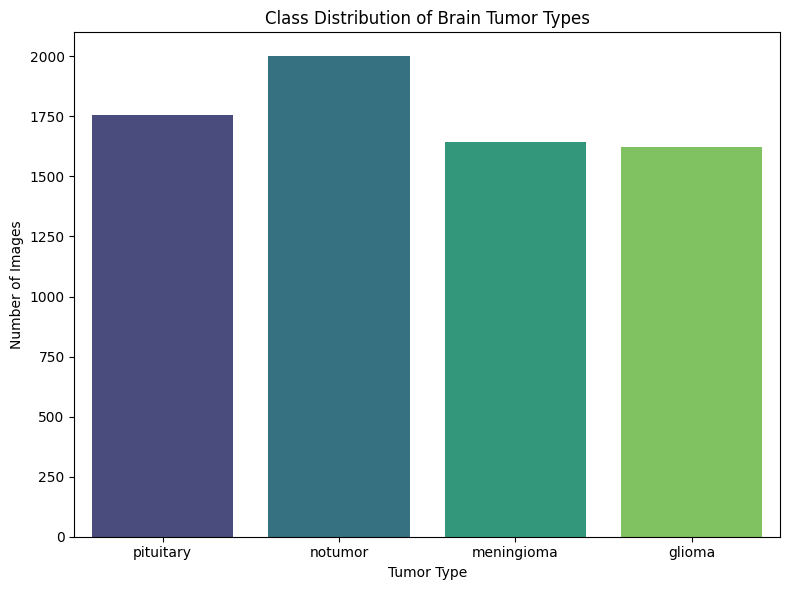

In [25]:
# 4. Visualizations

# Chart 1: Class Distribution (Bar Plot)
# Visualize the number of images per tumor type
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Class Distribution of Brain Tumor Types')
plt.xlabel('Tumor Type')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()

### Chart 2: Class Proportion (Pie Chart)

#### Purpose
This visualization displays the proportion of each tumor type (e.g., glioma, meningioma, pituitary, notumor) in the brain tumor MRI dataset as a percentage. A pie chart helps quickly understand the relative contribution of each tumor type to the total dataset, highlighting any imbalances.

#### Code Explanation
The code creates a pie chart using `matplotlib` to show the percentage of images for each tumor type, with colors from the `seaborn` library for clarity.

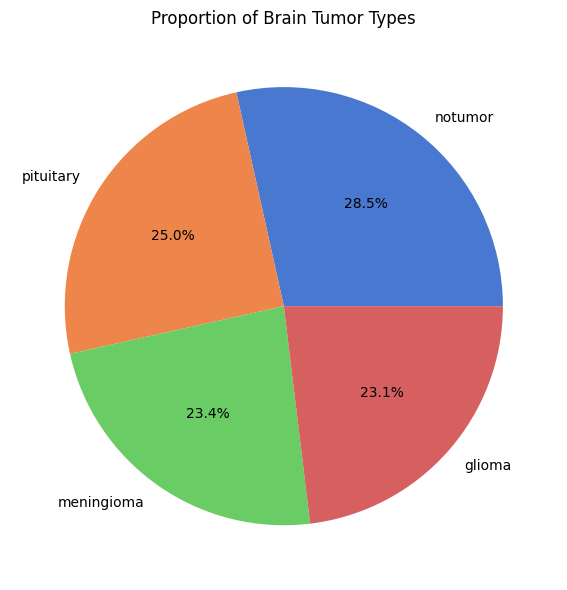

In [27]:
# Chart 2: Class Proportion (Pie Chart)
class_counts = data['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=sns.color_palette('muted'))
plt.title('Proportion of Brain Tumor Types')
plt.tight_layout()
plt.show()